In [17]:
import pandas as pd

In [18]:
data= pd.read_csv(r"D:\programming\2024-2025\Data-analytics-methods-and-technologies\lab1\BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

numeric_features = [
    "Customer_Age", "Dependent_count", "Months_on_book",
    "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1",
    "Total_Trans_Ct", "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio"
]

filtered_data = data[numeric_features + ["Total_Trans_Amt"]].dropna()

X = filtered_data[numeric_features]
y = filtered_data["Total_Trans_Amt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

coefficients = model.coef_
intercept = model.intercept_

regression_equation = f"Total_Trans_Amt = {intercept:.2f} + " + " + ".join(
    [f"({coef:.2f} * {col})" for coef, col in zip(coefficients, numeric_features)]
)

rss = ((y_test - y_pred) ** 2).sum()
rmse = mean_squared_error(y_test, y_pred, squared=False)
rse = (rss / (len(y_test) - len(coefficients) - 1)) ** 0.5
r2 = r2_score(y_test, y_pred)

performance_metrics = {
    "RSS": rss,
    "RMSE": rmse,
    "RSE": rse,
    "R^2": r2,
    "Coefficients": coefficients,
    "Intercept": intercept,
}

regression_equation, performance_metrics


d:\programming\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


('Total_Trans_Amt = -3673.99 + (9.91 * Customer_Age) + (-53.95 * Dependent_count) + (-7.46 * Months_on_book) + (0.38 * Total_Revolving_Bal) + (0.02 * Avg_Open_To_Buy) + (631.58 * Total_Amt_Chng_Q4_Q1) + (115.97 * Total_Trans_Ct) + (-260.25 * Total_Ct_Chng_Q4_Q1) + (-1437.13 * Avg_Utilization_Ratio)',
 {'RSS': 7652241206.491272,
  'RMSE': 1943.455518316248,
  'RSE': 1948.2696339859995,
  'R^2': 0.6691457635981475,
  'Coefficients': array([ 9.91296622e+00, -5.39492786e+01, -7.46436547e+00,  3.80427860e-01,
          1.87871917e-02,  6.31580572e+02,  1.15973506e+02, -2.60247945e+02,
         -1.43712904e+03]),
  'Intercept': -3673.986500306036})

Низький рівень R^2 пояснюється тим, що обрані змінні лише частково впливають на цільову змінну

In [20]:
import matplotlib.pyplot as plt
import numpy as np

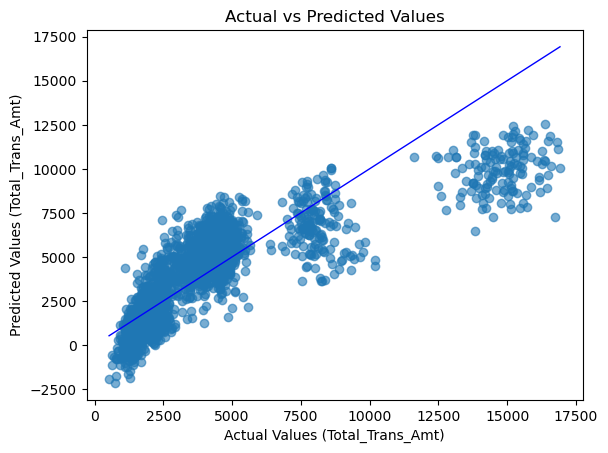

In [21]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=1)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values (Total_Trans_Amt)")
plt.ylabel("Predicted Values (Total_Trans_Amt)")
plt.title("Actual vs Predicted Values")
plt.show()


In [22]:
average_values = X.mean()
step_values = pd.DataFrame([average_values] * 3)
step_values["Customer_Age"] += [1, 2, 3] 

future_predictions = model.predict(step_values)

future_predictions

array([4404.52847984, 4414.44144606, 4424.35441228])